In [1]:
import sys
sys.path.insert(0,"../")

In [2]:
from torchmetrics import Accuracy   
from torchmetrics.classification import MulticlassAUROC, MulticlassRecall
import torch

In [20]:
recall = MulticlassAUROC(num_classes=3)

In [17]:
sum([0.75, 0.05, 0.05, 0.05, 0.05])

0.9500000000000002

In [23]:
recall(torch.tensor([[0.14,0.21,0.64],[0.14,0.21,0.64]]),torch.tensor([2,2]))

/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: No negative samples in targets, false positive value should be meaningless. Returning zero tensor in false positive score
  warnings.warn(*args, **kwargs)


tensor(0.)

In [27]:
from torchmetrics.classification import MulticlassAUROC
preds = torch.tensor([[0.14,0.21,0.64],[0.14,0.21,0.64]])
target = torch.tensor([2,1])
metric = MulticlassAUROC(num_classes=3, average="macro", thresholds=None)
metric(preds, target)

tensor(0.3333)

In [2]:
from utils.dataloader import ResnetDataset
from utils.transformations import CustomTransformations
from models.resnet50 import MyopiaClasificationModel
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from torchmetrics.functional import accuracy, auroc

In [3]:
import torch
from torch.utils.data import DataLoader
train_features = ResnetDataset("../train.csv","../../test/",transform=CustomTransformations(1024))
train_loader = DataLoader(train_features,batch_size=1,num_workers=1,shuffle=True)

# Initialize a trainer
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=4,
    callbacks=[TQDMProgressBar()],
    log_every_n_steps=4
)

miopia_model = MyopiaClasificationModel(1024)

# Train the model ⚡


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [4]:
trainer.fit(miopia_model, train_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type               | Params
------------------------------------------------
0 | model    | ResNet50TF         | 23.5 M
1 | accuracy | MulticlassAccuracy | 0     
2 | auc      | MulticlassAUROC    | 0     
------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.057    Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:232: UserWarning: You called `self.log('step', ...)` in your `training_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(
`Trainer.fit` stopped: `max_epochs=4` reached.


In [7]:
a = torch.randn(3, 4)
a
torch.argmax(a, dim=1)

tensor([2, 2, 2])

In [5]:
a

tensor([[-0.6685,  0.2749,  0.2660,  0.6036],
        [-0.7418, -0.6860, -2.2189,  0.3964],
        [ 0.5385,  1.5238,  2.0222,  1.3556]])

In [14]:
from utils.createCSV import createCSV

In [4]:
!pwd

/workspace/notebooks/models


In [5]:
createCSV("../../test/","../","../utils/customData.json")

In [6]:
createCSV?

Signature: createCSV(dir_path, outputPath, json_path)
Docstring: <no docstring>
File:      /workspace/notebooks/utils/createCSV.py
Type:      function

In [3]:
# path donde está el modelo resnet con los pesos
!cp /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth .

In [8]:
import pandas as pd
df = pd.read_csv("../train.csv")

In [9]:
df

,imgPath,label
0,../../test/P0212.jpg,2
1,../../test/N0002.jpg,1
2,../../test/P0002.jpg,2
3,../../test/P0001.jpg,2


In [10]:
df.loc[3,"imgPath"]

'../../test/P0001.jpg'

In [6]:
img = read_image("../../test/H0001.jpg").type_as(torch.FloatTensor())

In [7]:
img = transforms.Resize((512,512))(img)

In [8]:
x =torch.rand(1,3)

In [9]:
x

tensor([[0.4291, 0.9208, 0.0894]])

In [10]:
from torch.nn import functional as F

In [11]:
yhat = F.softmax(x,dim=1)

In [12]:
yhat

tensor([[0.2988, 0.4885, 0.2127]])

In [21]:
label = torch.tensor([2])
label = F.one_hot(label, 3).float()

In [22]:
label

tensor([[0., 0., 1.]])

In [24]:
F.cross_entropy(yhat,label)

tensor(1.1465)

In [32]:
img2 = torch.nn.Conv2d(3,3, (3,3), stride=1, padding=1)(img)

In [33]:
img2.shape

torch.Size([3, 512, 512])

In [5]:
(1024-3)/2 +1

511.5

In [15]:

(512-3 + 1 )/2 + 1 

256.0

In [ ]:
.fc = nn.Linear(512, 1)

In [18]:
num_classes = 2  # 1 class (person) + background

print(model.fc)
# 1024

Linear(in_features=2048, out_features=1000, bias=True)


In [36]:
model.fc = nn.Linear(2048,3,bias=True)

In [37]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [35]:
output

tensor([[0.7326, 0.1827, 0.0847],
        [0.1458, 0.1674, 0.6867]])

In [1]:
!nvidia-smi

Sat Mar 25 16:44:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.60.02    Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8    N/A /  N/A |     92MiB /  4096MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.cuda.is_available()

True

In [2]:
from utils.createCSV import resnetCSV

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
resnetCSV("../../data/Training/PALM-Training400","../train_resnet50","../utils/filteredH.json")

In [12]:
import pytorch_lightning as pl
import os
import math
from torch import optim, nn
from torch.nn import functional as F
import pytorch_lightning as pl
from torchvision.models import resnet50, ResNet50_Weights
from torchmetrics import Accuracy   
from torchmetrics.classification import MulticlassAUROC, MulticlassRecall
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
import torch

In [16]:
    import sys
    sys.path.insert(0,"../")
    from utils.dataloader import CustomImageDataset
    from utils.transformations import CustomTransformations
    from models.resnet50 import MyopiaClasificationModel
    from pytorch_lightning import Trainer
    from pytorch_lightning.callbacks.progress import TQDMProgressBar
    from torchmetrics.functional import accuracy, auroc
    import torch
    from torch.utils.data import DataLoader
    
    config = {
        "batch_size":1,
        "img_size":1024,
        "num_workers":2,
        "num_classes":3,
        "lr":1e-3
    }
    
    
    pl.seed_everything(42,workers=True)
    train_features = CustomImageDataset("../train_resnet50/train_resnet50.csv","../../train_resnet50/",transform=CustomTransformations(config["img_size"]))
    train_loader = DataLoader(train_features,batch_size=config["batch_size"],num_workers=config["num_workers"],shuffle=True)

    # Initialize a trainer
    trainer = Trainer(
        accumulate_grad_batches=32, # acumula los gradientes de los primeros 4 batches
        #deterministic=True,
        accelerator="auto",
        devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
        max_epochs=1000,
        callbacks=[TQDMProgressBar(),
                   EarlyStopping(monitor="train_val_loss",mode="min",patience=3),
                   ModelCheckpoint(dirpath="./model-checkpoint/",\
                    filename="{epoch}-{train_val_acc:.2f}",
                    save_top_k=2, 
                    monitor="train_val_loss")],
        log_every_n_steps=1,
        # resume_from_checkpoint="some/path/to/my_checkpoint.ckpt"
    )
    
    val_loader = train_loader
    #test_loader = train_loader

    miopia_model = MyopiaClasificationModel(config)
    trainer.fit(miopia_model, train_loader,val_loader)
    #trainer.test(miopia_model,test_loader)


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type               | Params
------------------------------------------------
0 | model    | ResNet50TF         | 23.5 M
1 | accuracy | MulticlassAccuracy | 0     
2 | auc      | MulticlassAUROC    | 0     
3 | recall   | MulticlassRecall   | 0     
------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.057    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:232: UserWarning: You called `self.log('step', ...)` in your `training_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [1]:
import sys
sys.path.insert(0,"../")
from models.resnet50 import MyopiaClasificationModel
from utils.dataloader import ResnetDataset
from torch.utils.data import DataLoader
config = {
        "batch_size":1,
        "img_size":1024,
        "num_workers":2,
        "num_classes":3,
        "lr":1e-3
    }
model = MyopiaClasificationModel.load_from_checkpoint("./model-checkpoint/resnet50-epoch=1-train_val_acc=0.71.ckpt")

val_dataset = ResnetDataset("../train_resnet50/val_resnet50.csv","../../train_resnet50/",transform=None)
val_loader = DataLoader(val_dataset,batch_size=config["batch_size"],num_workers=config["num_workers"],shuffle=False)

model.eval()




MyopiaClasificationModel(
  (model): ResNet50TF(
    (resNet50): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (r

In [2]:
import numpy as np 
predicted = np.array([])
target = np.array([])
for x,y in val_loader:
    yhat = model(x)
    y_pred = torch.argmax(yhat, dim=1).cpu().numpy() # predicted labels
    y_true = y.cpu().numpy() # true labels
    predicted = np.append(predicted,y_pred)
    target = np.append(target,y_true)
    break
    
    
    

: 

: 

In [15]:
import sys
sys.path.insert(0,"../")
from models.resnet50 import MyopiaClasificationModel
from utils.dataloader import ResnetDataset
from utils.transformations import CustomTransformations
from torch.utils.data import DataLoader
import torch
config = {
        "batch_size":2,
        "img_size":1024,
        "num_workers":2,
        "num_classes":3,
        "lr":1e-3
    }
model = MyopiaClasificationModel.load_from_checkpoint("./model-checkpoint/resnet50-epoch=1-train_val_acc=0.71.ckpt")

val_dataset = ResnetDataset("../train_resnet50/train_resnet50.csv","../../train_resnet50/",transform=CustomTransformations(config["img_size"]))
val_loader = DataLoader(val_dataset,batch_size=config["batch_size"],num_workers=config["num_workers"],shuffle=False)

model.eval()
import numpy as np 
predicted = np.array([])
target = np.array([])
from tqdm import tqdm
with tqdm(total=72) as pbar:
    for x,y in val_loader:
        with torch.no_grad():
            yhat = model(x)
        y_pred = torch.argmax(yhat, dim=1).cpu().numpy() # predicted labels
        y_true = y.cpu().numpy() # true labels
        predicted = np.append(predicted,y_pred)
        target = np.append(target,y_true)
        pbar.update(2)

286it [10:41,  2.24s/it]                       


In [16]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(target,predicted)

In [14]:
conf

array([[ 0,  3,  1],
       [ 0, 26,  8],
       [ 0,  1, 33]])

In [4]:

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 293 kB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


<AxesSubplot: >

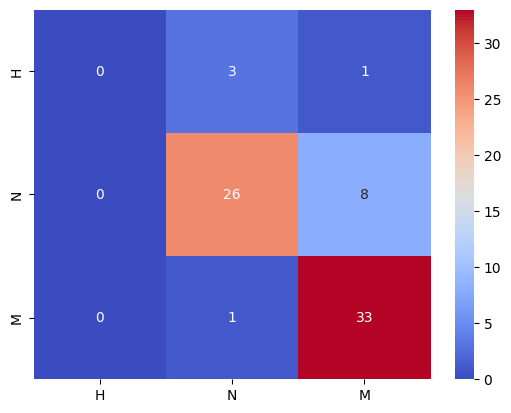

In [13]:
xticklabels=["H","N","M"]
sns.heatmap(conf,annot=True,cmap="coolwarm",xticklabels=xticklabels,yticklabels=xticklabels)

<AxesSubplot: >

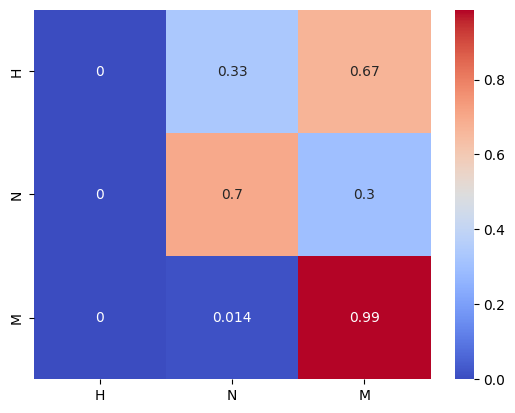

In [19]:
xticklabels=["H","N","M"]
sns.heatmap(cm_norm,annot=True,cmap="coolwarm",xticklabels=xticklabels,yticklabels=xticklabels)

In [18]:
cm_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

In [ ]:
c